## Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from tqdm import tqdm
from graphviz import Graph
from sklearn import preprocessing

from prim_algo import prims # implementation of prim's algo used in this code
from est_MI import est_MI_JVHW, est_MI_MLE


## Load the dataset

In [2]:
df = pd.read_csv('alarm10K.csv')
df.head()

,HISTORY,CVP,PCWP,HYPOVOLEMIA,LVEDVOLUME,LVFAILURE,STROKEVOLUME,ERRLOWOUTPUT,HRBP,HREKG,...,MINVOLSET,VENTMACH,VENTTUBE,VENTLUNG,VENTALV,ARTCO2,CATECHOL,HR,CO,BP
0,False,NORMAL,NORMAL,False,NORMAL,False,NORMAL,False,HIGH,HIGH,...,NORMAL,ZERO,ZERO,LOW,HIGH,LOW,HIGH,HIGH,HIGH,HIGH
1,False,NORMAL,NORMAL,False,NORMAL,False,LOW,False,HIGH,HIGH,...,HIGH,HIGH,ZERO,ZERO,ZERO,HIGH,HIGH,HIGH,LOW,LOW
2,False,NORMAL,NORMAL,False,NORMAL,False,NORMAL,False,NORMAL,HIGH,...,HIGH,HIGH,HIGH,LOW,HIGH,LOW,NORMAL,LOW,LOW,NORMAL
3,False,NORMAL,NORMAL,False,NORMAL,False,NORMAL,False,HIGH,HIGH,...,NORMAL,NORMAL,LOW,ZERO,ZERO,HIGH,HIGH,HIGH,HIGH,HIGH
4,False,NORMAL,NORMAL,False,NORMAL,False,NORMAL,False,HIGH,HIGH,...,NORMAL,NORMAL,LOW,ZERO,LOW,HIGH,HIGH,HIGH,HIGH,HIGH


### Check for NaN and Null values

In [3]:
df.isnull().values.any()

False

## Evaluate Mutual Information for all combinations of columns

In [4]:
num_variables = len(df.columns)
MI_MLE  = np.zeros((num_variables,num_variables))
MI_JVHW = np.zeros((num_variables,num_variables))
labelEncoder = preprocessing.LabelEncoder()
for i in tqdm(range(num_variables)):
    for j in range(num_variables):
        if i!=j:
            X = labelEncoder.fit_transform(df[df.columns[i]])
            Y = labelEncoder.fit_transform(df[df.columns[j]])
            I_JVHW = est_MI_JVHW(X, Y)
            I_MLE  = est_MI_MLE(X, Y)
            MI_JVHW[i,j] = I_JVHW
            MI_MLE[i,j]  = I_MLE
            


100%|██████████| 37/37 [00:35<00:00,  1.03it/s]


## Plot the trees

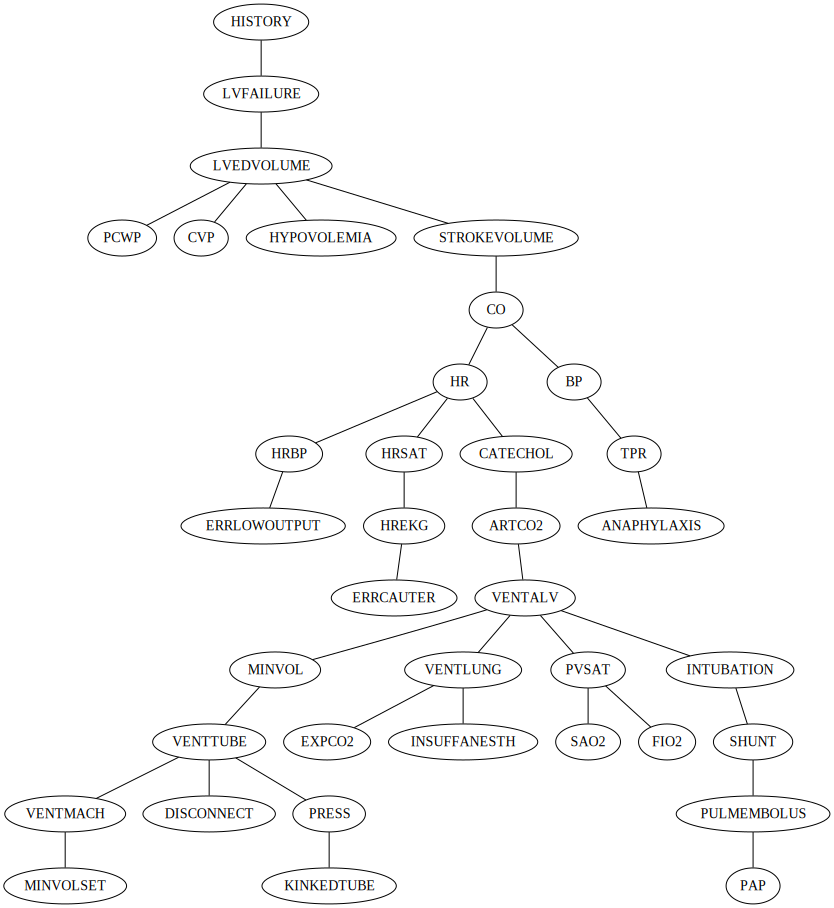

In [5]:
g=prims(len(df.columns),-MI_JVHW)
dotJVHW = Graph()
hist=[]
weightsJVHW = []
for i in range(len(g)):
    src,dest,weight = g[i]
    if not [dest,src] in hist:
#         print(-weight)
        dotJVHW.edge(df.columns[src],df.columns[dest])
        hist.append([src,dest])
        weightsJVHW.append([weight])
dotJVHW

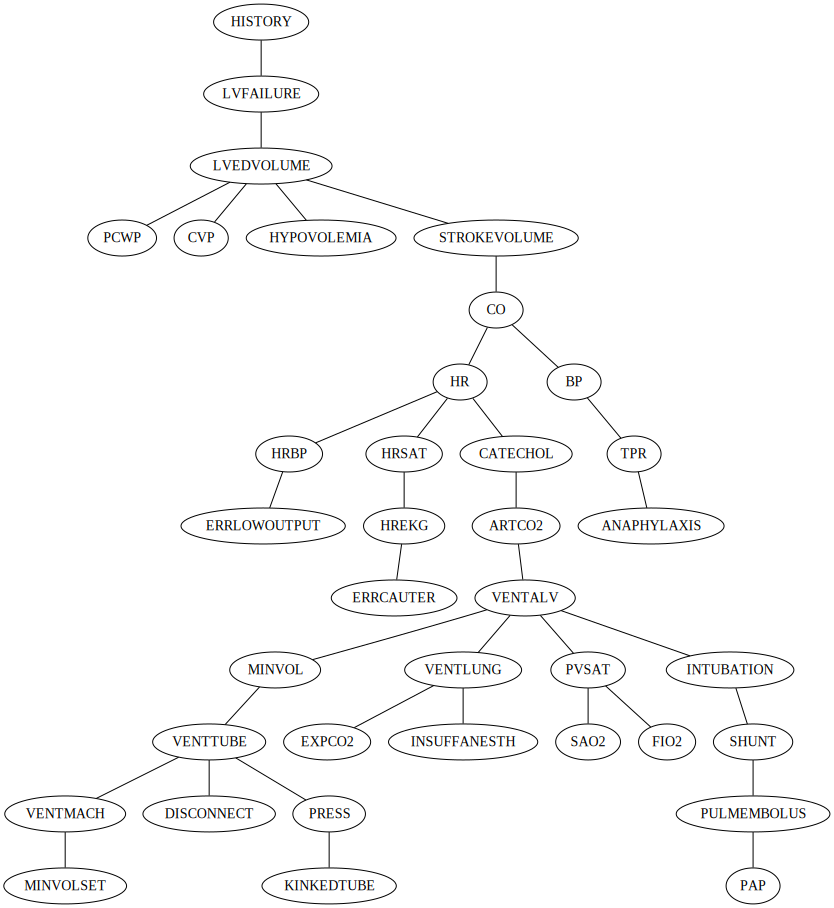

In [6]:
g=prims(len(df.columns),-MI_MLE)
dot = Graph()
hist=[]
weights = []
for i in range(len(g)):
    src,dest,weight = g[i]
    if not [dest,src] in hist:
#         print(-weight)
        dot.edge(df.columns[src],df.columns[dest])
        hist.append([src,dest])
        weights.append([weight])
dot

## Save the Graphs as pdf

In [7]:
if not os.path.exists('./GraphOutputs'):
    os.makedirs('./GraphOutputs')
dot.render('GraphOutputs/plugin.gv',view=True)
dotJVHW.render('GraphOutputs/JVHW.gv',view=True)

'GraphOutputs/JVHW.gv.pdf'

## Extra Observations

## Mean Square Error between the Mutual Information matrices obtained from Plugin Estimator and JVHW estimator

The L1 norm as well as the L2 norm between the mutual information matrices obtained from the plugin estimator as well as the JVHW estimator is quite small. Which implies that both are almost equal.

In [8]:
print(np.linalg.norm(MI_JVHW-MI_MLE,2))
print(np.linalg.norm(MI_JVHW-MI_MLE,1))

0.007270132360622513
0.011313238399488723


## The weights between the nodes in both the graphs obtained
The weights between the nodes in the tree obtained are also quite similar. All the values of the weights between the nodes are comparable to each other and hence there is no need of removal of nodes from the graph for weights being very small.

The reason for removal of nodes is that we if the weights between a variable is very small then practically it is independent of all other variables and hence does not belong to any tree. Although, there is no requirement of removal of nodes in this problem.

In [9]:
weights = -np.array(weights).reshape((len(weights),1))
weightsJVHW = -np.array(weightsJVHW).reshape((len(weightsJVHW),1))
pd.DataFrame(np.concatenate((weights,weightsJVHW),1),columns=['Plugin','JVHW'])


,Plugin,JVHW
0,0.203017,0.203017
1,0.185770,0.185698
2,0.883967,0.883751
3,0.650134,0.649918
4,0.410676,0.410603
5,0.155506,0.155289
6,0.451881,0.451665
7,0.348432,0.348216
8,0.572157,0.571941
9,0.518383,0.518167
